<font size="8">作业1 </p>
<font size="5">1、基于Sesame，获取所有NGC天体的位置

In [2]:
from astropy.coordinates import SkyCoord
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import matplotlib as mpl

ra = []
dec = []
name = []
for i in tqdm(range(1, 8000)):
    try:
        Pos=SkyCoord.from_name('NGC %d'%i)
        name.append('NGC '+str(i))
        ra.append(Pos.ra.degree)
        dec.append(Pos.dec.degree)
    except:
        break
len(name)

 98%|█████████▊| 7840/7999 [00:07<00:00, 1082.17it/s]


7840

<font size="5">2、分别在赤道坐标系和银坐标系画出天球位置分布（可以适当阐述分布特征：如是否有成团性)

In [3]:
import astropy.coordinates as coord
def coordinates_aitoff_plot(coords):
    fig, ax = plt.subplots(figsize=(10, 4), 
                           subplot_kw=dict(projection="aitoff"))
    
    sph = coords.spherical
    cs = ax.scatter(-sph.lon.wrap_at(180*u.deg).radian,
                    sph.lat.radian,
                    c='orange',
                    marker='*',
                    alpha=0.3,
                    label='NGC objects')

    def fmt_func(x, pos):
        val = coord.Angle(-x*u.radian).wrap_at(360*u.deg).degree
        return f'${val:.0f}' + r'^{\circ}$'

    ticker = mpl.ticker.FuncFormatter(fmt_func)
    ax.xaxis.set_major_formatter(ticker)

    ax.grid()
    
    return fig, ax

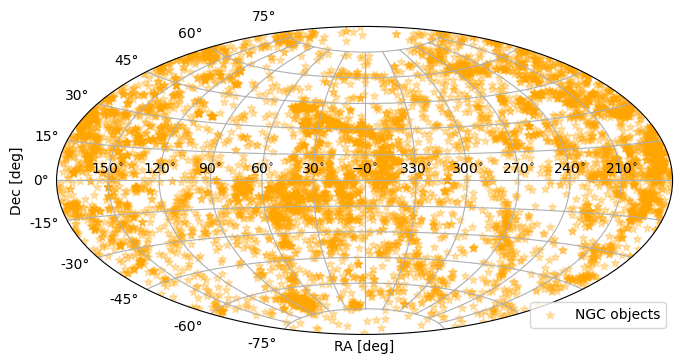

In [4]:
coords = SkyCoord(ra=np.array(ra)*u.deg, dec=np.array(dec)*u.deg, frame='icrs')
fig, ax = coordinates_aitoff_plot(coords)
ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')
ax.legend()

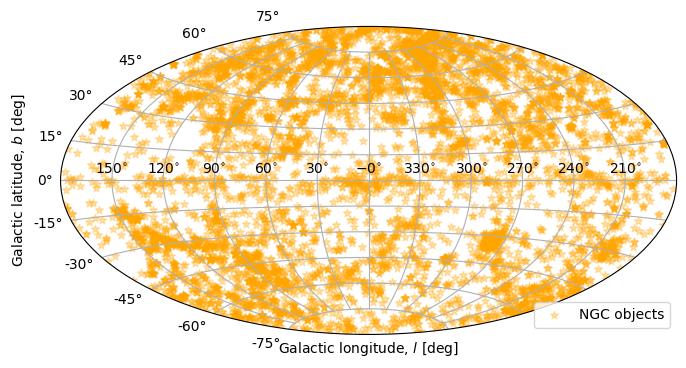

In [5]:
coords_gal = coords.galactic
fig, ax = coordinates_aitoff_plot(coords_gal);
ax.set_xlabel('Galactic longitude, $l$ [deg]')
ax.set_ylabel('Galactic latitude, $b$ [deg]')
ax.legend(loc=4)

### SSY: 图例改小一点和其它同学对比一下

我感觉这里的分布都较为均匀，在做第三题的时候我发现NGC的这些天体在银经银纬大概280度，-30度的地方有成团性

<font size="5">3、Heapix分区NSIDE至少为多少时，保证每个pixel中只有一个星系？

Text(7.569444444444445, 0.5, 'GB [deg]')

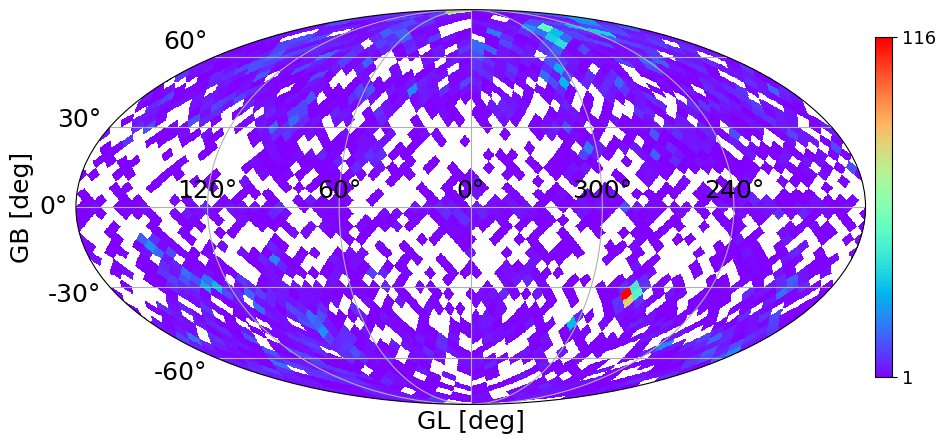

In [9]:
from healpy.newvisufunc import projview, newprojplot
import healpy as hp
nside = 16
npix = hp.nside2npix(nside)
indices = hp.ang2pix(nside, list(np.radians(90.-coords_gal.b.deg)), list(np.radians(coords_gal.l.deg)))
indi, counts = np.unique(indices, return_counts=True)
hpx_map = np.zeros(npix, dtype=int)
hpx_map[indi] = counts

hpx_map = np.where(hpx_map==0, np.nan, hpx_map)

projview(np.ma.masked_invalid(hpx_map), cmap='rainbow', graticule=1, graticule_labels=1, fontsize=
         {'cbar_label':18, 'cbar_tick_label':13}, cb_orientation='vertical')
plt.tick_params(labelsize=18)
plt.xlabel('GL [deg]', size=18)
plt.ylabel('GB [deg]', size=18)

Text(7.569444444444445, 0.5, 'GB [deg]')

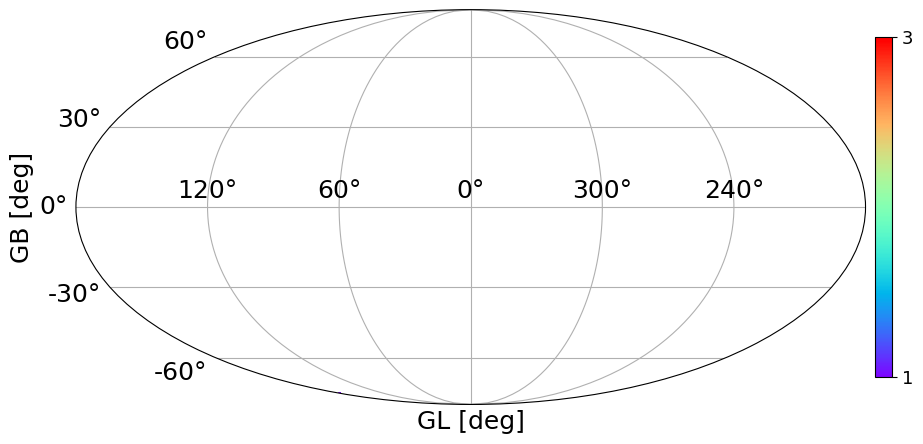

In [6]:

nside = 8192
npix = hp.nside2npix(nside)
indices = hp.ang2pix(nside, list(np.radians(90.-coords_gal.b.deg)), list(np.radians(coords_gal.l.deg)))
indi, counts = np.unique(indices, return_counts=True)
hpx_map = np.zeros(npix, dtype=int)
hpx_map[indi] = counts

hpx_map = np.where(hpx_map==0, np.nan, hpx_map)

projview(np.ma.masked_invalid(hpx_map), cmap='rainbow', graticule=1, graticule_labels=1, fontsize=
         {'cbar_label':18, 'cbar_tick_label':13}, cb_orientation='vertical')
plt.tick_params(labelsize=18)
plt.xlabel('GL [deg]', size=18)
plt.ylabel('GB [deg]', size=18)


In [7]:
max(counts)

3

第三题这里对于所有的NGC天体我只能最大把NSIDE设置为$2^{13}$，一个pixel里最多的有3个星系。
我觉得如果把NSIDE设置得更大，比如等于$2^{14}$或者$2^{15}$时，能保证一个pixel内只有一个星系。
（我的电脑配置只能达到$2^{13}$，再大一点内核就崩溃了）

<font size="8">作业2 </p>
<font size="5">1、LAMOST的视场半径2.5度，某次观测视场中心为（Ra，Dec) =（110，30），请在天球坐标中准确画出LAMOST的视场观测范围。

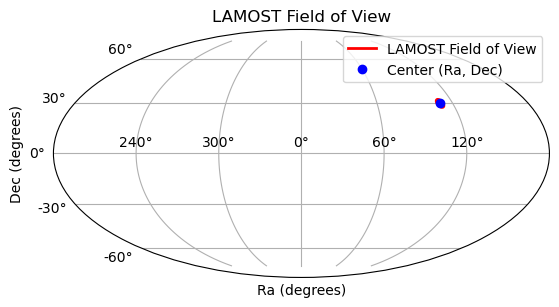

In [28]:
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
from tqdm import tqdm
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
import matplotlib as mpl
%matplotlib inline

ra_center = 110  
dec_center = 30  
radius = 2.5  


center_coord = SkyCoord(ra_center, dec_center, unit=(u.deg, u.deg), frame='icrs')


theta = np.linspace(0, 2 * np.pi, 100)  
r = np.full_like(theta, radius)  


ra_circle = center_coord.ra.deg + r * np.cos(theta)
dec_circle = center_coord.dec.deg + r * np.sin(theta)


fig, ax = plt.subplots(subplot_kw={'projection': 'mollweide'})  # 使用 mollweide 投影


ax.plot(np.radians(ra_circle), np.radians(dec_circle), color='red', lw=2, label='LAMOST Field of View')


ax.plot(np.radians(ra_center), np.radians(dec_center), 'bo', label='Center (Ra, Dec)')


ra_ticks = np.radians([-120, -60, 0, 60, 120])
ra_labels = ['240°', '300°', '0°', '60°', '120°']
ax.set_xticks(ra_ticks)
ax.set_xticklabels(ra_labels)

dec_ticks = np.radians([-60, -30, 0, 30, 60])
dec_labels = ['-60°', '-30°', '0°', '30°', '60°']
ax.set_yticks(dec_ticks)
ax.set_yticklabels(dec_labels)



ax.set_xlabel('Ra (degrees)')
ax.set_ylabel('Dec (degrees)')
ax.legend()
ax.grid(True)

ax.set_title('LAMOST Field of View')

plt.show()


In [ ]:
### SSY 还是用的直角坐标近似， http://cluster.shao.ac.cn/~shen/Lecture/change_cor.pro

<font size="5">
2、银河系的光度大概是10^11太阳光度，半光度半径Re大约是5Kpc。(太阳的V波段绝对星等是4.8等）。如果银河系距离观测者的距离是100kpc，其视星等和Re的视尺度（apparent size）各是多少？Re内的平均表面亮度是多少？如果距离是1Mpc呢？


解：距离为100kpc时：

   视半径$\theta=\frac{5kpc}{100kpc}\times\frac{360^{。}}{2\pi}=3^。$，视尺度$2\theta=6^。$ 
   
   $L(L_{\odot})=10^{-(M-M_{\odot})/2.5}, M_{\odot}=4.8mag, L=10^{11}L_{\odot}$

   所以银河系的绝对星等$M=-22.7mag$

   银河系的视星等$m=M+5lgd-5=-2.7mag$

   $R_e$内的平均表面亮度$mu=m+2.5log(area)=-2.7+2.5 \times log(\pi\theta^2)=18.7mag/sec^2$

   距离为1Mpc时：
   
   视半径$\theta=\frac{5kpc}{1000kpc}\times\frac{360^{。}}{2\pi}=0.3^。$，视尺度$2\theta=0.6^。$

   $L(L_{\odot})=10^{-(M-M_{\odot})/2.5}, M_{\odot}=4.8mag, L=10^{11}L_{\odot}$

   所以银河系的绝对星等$M=-22.7mag$

   银河系的视星等$m=M+5lgd-5=-22.7+5\times6-5=2.3mag$
   
   $R_e$内的平均表面亮度$mu=m+2.5log(area)=2.3+2.5 \times log(\pi\theta^2)=18.7mag/sec^2$